In [1]:
import pandas as pd
import numpy as np
import pathlib
from scipy import constants
from pprint import pprint
import matplotlib.pyplot as plt
if True:
    import sys
    sys.path.append("/home/salmon/workspace/fytok/python")
    sys.path.append("/home/salmon/workspace/SpDB/python")
    sys.path.append("/home/salmon/workspace/SpView/python")

    from fytok.load_profiles import (load_core_profiles, load_core_source,
                                     load_core_transport, load_equilibrium)
    from fytok.modules.transport.Equilibrium import Equilibrium
    from fytok.numlib.smooth import rms_residual
    from spdm.data import File, Function, Query
    from spdm.logger import logger
    from spdm.view.plot_profiles import plot_profiles, sp_figure


###########################


In [14]:
#eqdsk_file = File("/home/salmon/workspace/data/15MA inductive - burn/Standard domain R-Z/High resolution - 257x513/g900003.00230_ITER_15MA_eqdsk16HR.txt", format="geqdsk").read()

eqdsk_file = File("/home/salmon/workspace/fytok/test.geqdsk", format="geqdsk").read()

desc = load_equilibrium(eqdsk_file,
                        coordinate_system={
                            "psi_norm": np.linspace(0.0,  0.995, 128),
                            "theta": 64},
                        code={"name": "dummy"},
                        boundary={"psi_norm": 0.995}
                        )
eq = Equilibrium(desc)
psi_norm = np.linspace(0.0, 0.995, 32)


2022-11-08 16:55:07,057 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open GEQdskFile: /home/salmon/workspace/fytok/test.geqdsk mode='r'
2022-11-08 16:55:07,061 DEBUG [spd] /home/salmon/workspace/fytok/python/spdm/plugins/data/file/PluginGEQdsk.py:283:__init__: Open File /home/salmon/workspace/fytok/test.geqdsk mode=r


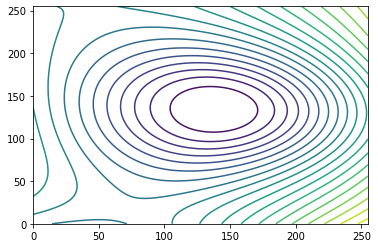

In [22]:
plt.contour(eq.profiles_2d._coord._psirz._array.transpose(),levels=20)


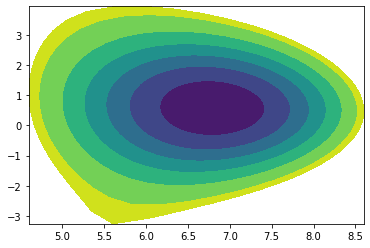

In [20]:
plt.contourf(eq.profiles_2d.r,eq.profiles_2d.z,eq.profiles_2d.psi)